<div align="center">
    <h2>Tarea Semanal 1</h2>
    <h1>Juan Ignacio Falabella</h1>  
</div> 

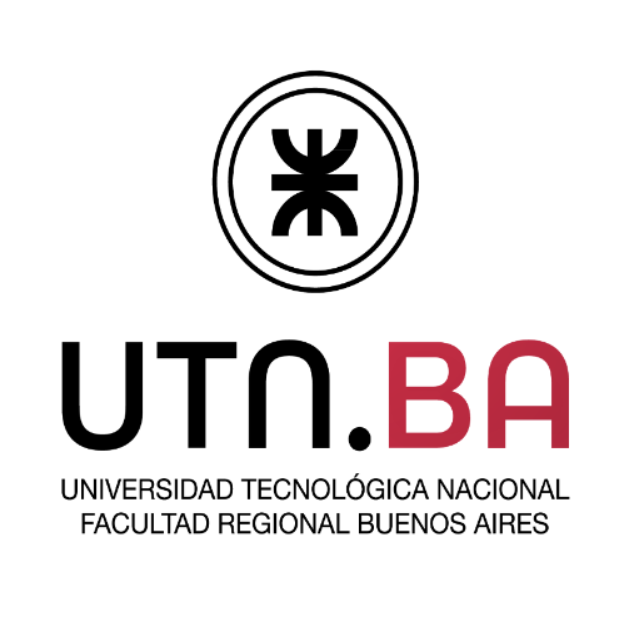

<div align="center">
    <h2>Entrega Parcial 18/4. Entrega Completa 21/5</h2>
</div>  


***

### Para los siguientes circuitos conocidos como Filtro Pasa Todo o Rotador de fase, se pide:
![image.png](attachment:image.png)
**1.** Obtener la función transferencia $V_{2}/V_{1}$ ( módulo , fase y diagrama de polos y ceros).\
**2.** Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?\
**3.** Simule la función transferencia normalizada (Python, Matlab, etc.).\
**4.** Simule el circuito y obtenga la respuesta en frecuencia pedida en A, para los valores indicados a continuación:
- R2/R1 = 1 
- R3 = 1 kΩ
- C = 1 µF

**5.** ¿Qué utilidad podría tener este tipo de circuitos pasa-todo?

**Bonus:**

+1 💎 Obtener una RED normalizada que responda a la función hallada en 3)\
+1 🎓 Verifique los resultados de 1 y 2 mediante el módulo de simulación simbólica SymPy.\
+1 🤯 Presentación en jupyter notebook

***

**1.** Obtener la función transferencia $V_{2}/V_{1}$ ( módulo , fase y diagrama de polos y ceros).\
**2.** Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?\

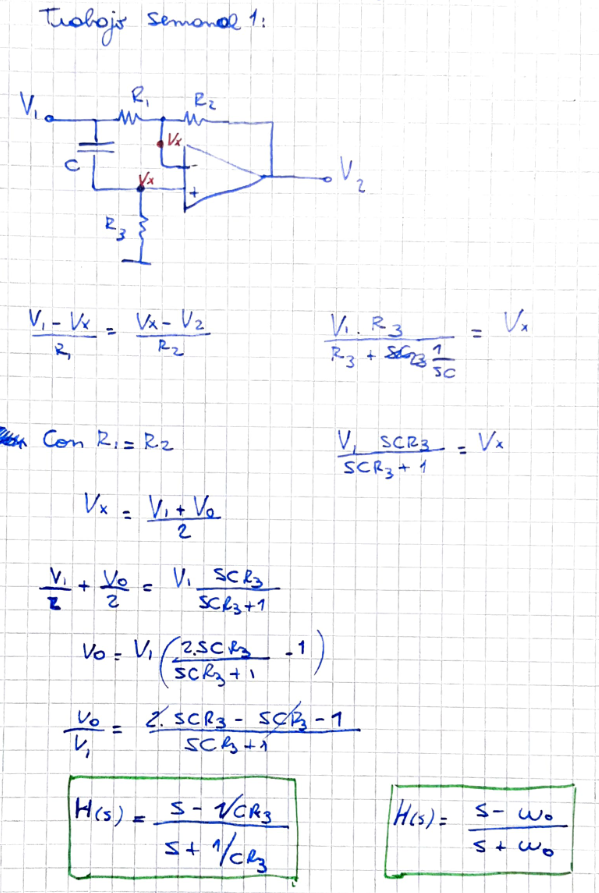
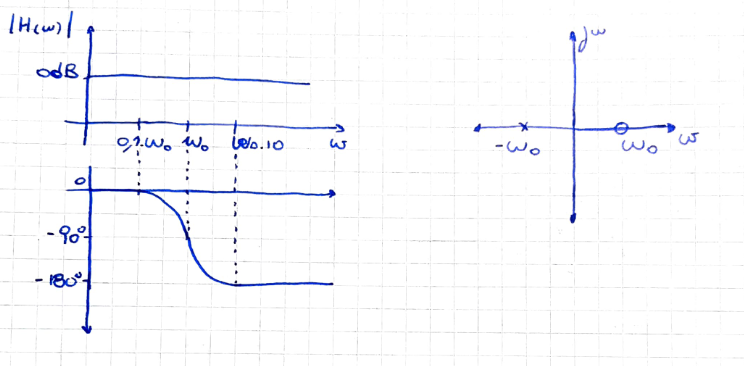

***

**3.** Simule la función transferencia normalizada (Python, Matlab, etc.).\

Poles: [-1.]
Zeros: [1.]
1 zeros: [1.]
1 poles: [-1.]
gain: 1.0


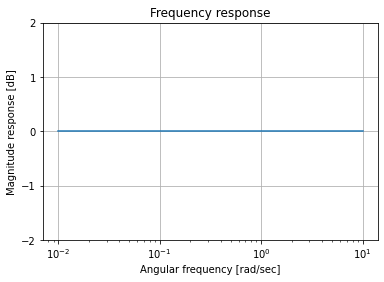

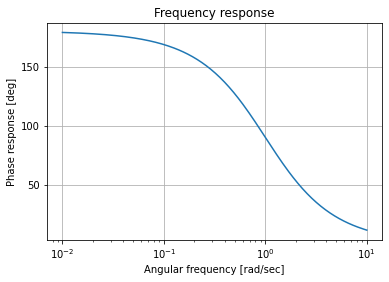

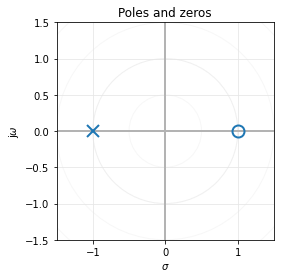

In [1]:
#%% TS1 Simulacion
import scipy.signal as sig
from mpl_toolkits.mplot3d import Axes3D
import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from splane import pzmap, grpDelay, bodePlot, convert2SOS
import math

plt.close('all')

w0 = 1

num = [1,-w0]
den = [1,w0]  

myFilter = sig.TransferFunction(num,den)

print('Poles:',myFilter.poles)
print('Zeros:',myFilter.zeros)


w, mag, phase = myFilter.bode(n=200)

 #  plt.figure()
plt.figure("Magnitude response")
plt.semilogx(w, mag)    # Bode magnitude plot
plt.ylim(-2,2)
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Magnitude response [dB]')
plt.title('Frequency response')
   
#   plt.figure()
plt.figure("Phase response")
plt.semilogx(w, phase)    # Bode phase plot
plt.grid(True)
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase response [deg]')
plt.title('Frequency response')
    
pzmap(myFilter)


plt.rcParams.update({'font.size': 16})

plt.show()

SOSpolynomials = convert2SOS(myFilter)

**4.** Simule el circuito y obtenga la respuesta en frecuencia pedida en A, para los valores indicados a continuación:
- R2/R1 = 1 
- R3 = 1 kΩ
- C = 1 µF

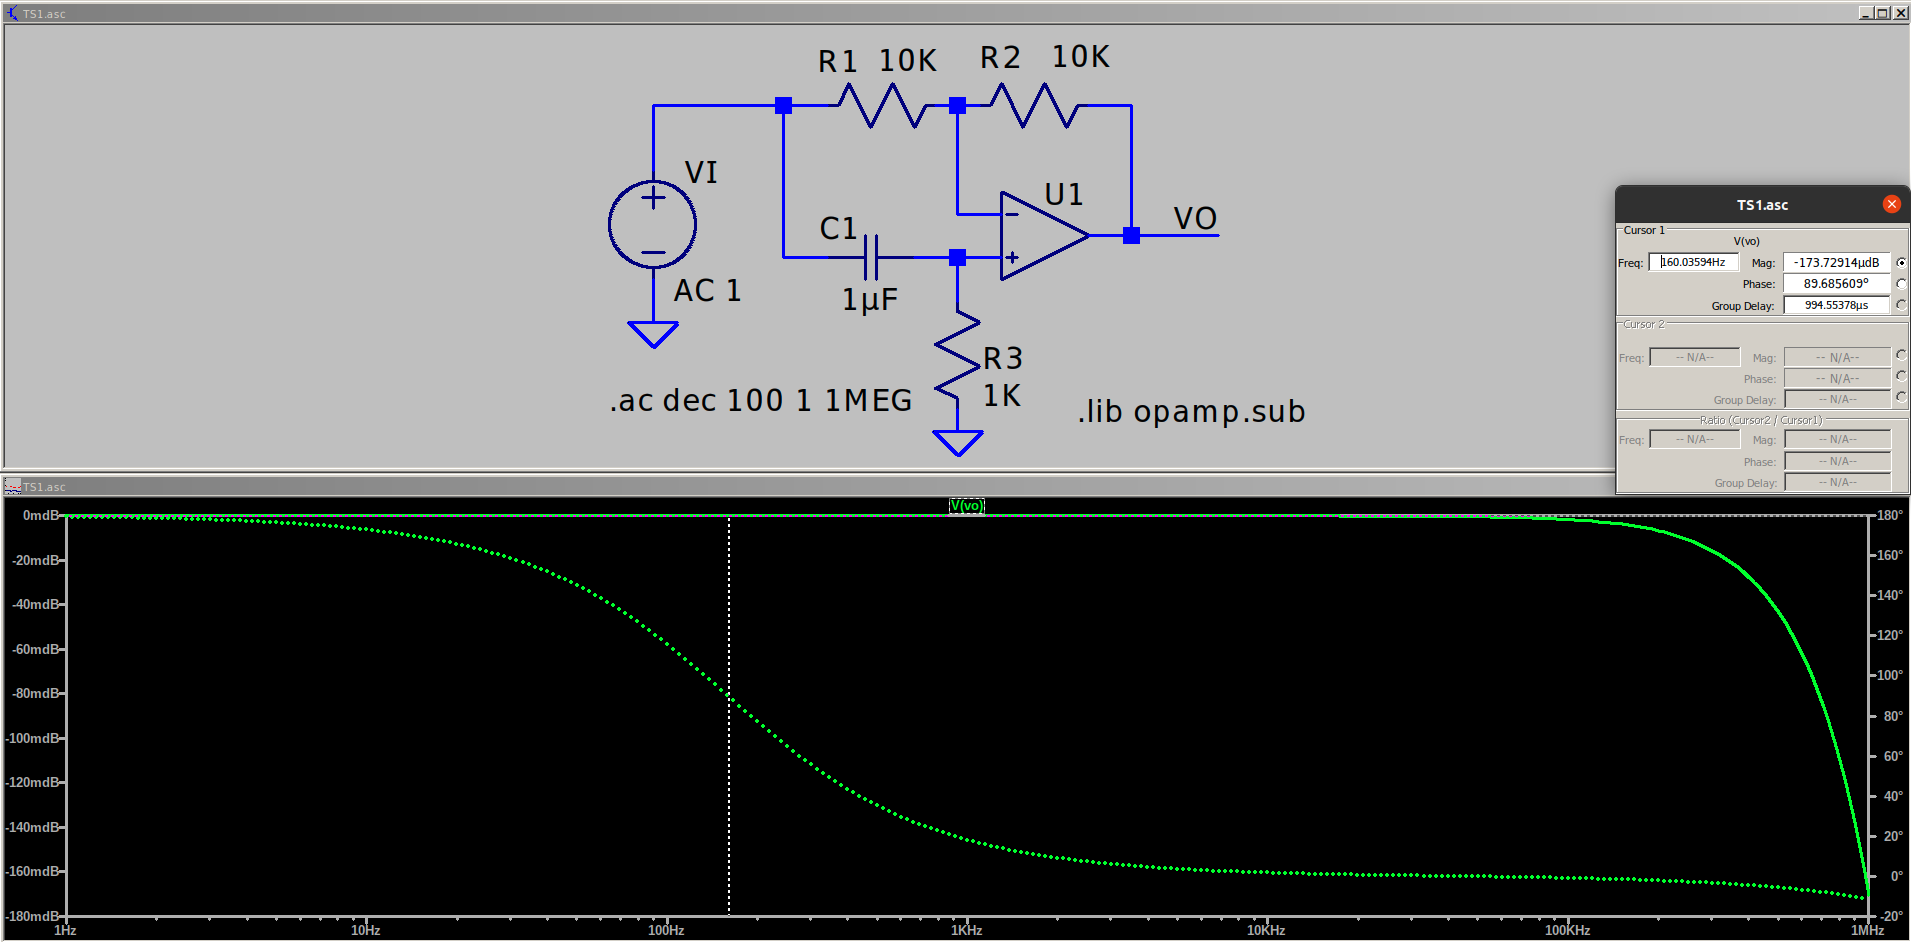


**5.** ¿Qué utilidad podría tener este tipo de circuitos pasa-todo?

<div class="alert alert-block alert-success">
    
Este circuito modifica la respuesta en fase respecto de la frecuencia, manteniendo siempre la ganancia. Se puede utilizar para corregir la fase en sistemas de comunicacion, también se podría utilizar para generar una demora en la señal, sin modificar su amplitud.
</div>


**Bonus:**

+1 💎 Obtener una RED normalizada que responda a la función hallada en 3)\
+1 🎓 Verifique los resultados de 1 y 2 mediante el módulo de simulación simbólica SymPy.\
+1 🤯 Presentación en jupyter notebook

### Verifique los resultados de 1 y 2 mediante el módulo de simulación simbólica SymPy.

In [2]:
#%% TS1 Sympy
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

V1, V2, Vx = sp.symbols("V1, V2, Vx")
R1, R2, R3, C = sp.symbols("R1, R2, R3, C")

aa = sp.solve([ 
                (Vx-V2)/R2 + (Vx-V1)/R1, 
                (V1-Vx)*s*C - Vx/R3
                ],
                [V1, V2])

transf_func = aa[V2]/aa[V1]


num, den = sp.fraction(sp.simplify(sp.expand(transf_func)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

transf_func_final = sp.Mul(k,num/den, evaluate=False)

display(transf_func_final)
display(Math( r' \omega_o = ' + sp.latex(wo) ))


1*((s - R2/(C*R1*R3))/(s + 1/(C*R3)))

<IPython.core.display.Math object>

**Con R1=R2=R3=R**

In [3]:
#%% TS1 Sympy
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

V1, V2, Vx = sp.symbols("V1, V2, Vx")
R1, R2, R3, C, R = sp.symbols("R1, R2, R3, C, R")

aa = sp.solve([ 
                (Vx-V2)/R2 + (Vx-V1)/R1, 
                (V1-Vx)*s*C - Vx/R3
                ],
                [V1, V2])

transf_func = aa[V2]/aa[V1]

transf_func = transf_func.subs(R1, R)
transf_func = transf_func.subs(R2, R)
transf_func = transf_func.subs(R3, R)

num, den = sp.fraction(sp.simplify(sp.expand(transf_func)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

transf_func_final = sp.Mul(k,num/den, evaluate=False)

display(transf_func_final)
display(Math( r' \omega_o = ' + sp.latex(wo) ))

1*((s - 1/(C*R))/(s + 1/(C*R)))

<IPython.core.display.Math object>

**Con R1=R2=R3=1 y C=1**

In [4]:
#%% TS1 Sympy
import sympy as sp
from sympy.abc import s
from IPython.display import display, Math

V1, V2, Vx = sp.symbols("V1, V2, Vx")
R1, R2, R3, C, R = sp.symbols("R1, R2, R3, C, R")

aa = sp.solve([ 
                (Vx-V2)/R2 + (Vx-V1)/R1, 
                (V1-Vx)*s*C - Vx/R3
                ],
                [V1, V2])

transf_func = aa[V2]/aa[V1]

transf_func = transf_func.subs(R1, 1)
transf_func = transf_func.subs(R2, 1)
transf_func = transf_func.subs(R3, 1)
transf_func = transf_func.subs(C, 1)

num, den = sp.fraction(sp.simplify(sp.expand(transf_func)))

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

den_coeffs = den.all_coeffs()
wo = den_coeffs[-1]

transf_func_final = sp.Mul(k,num/den, evaluate=False)

display(transf_func_final)
display(Math( r' \omega_o = ' + sp.latex(wo) ))

1*((s - 1)/(s + 1))

<IPython.core.display.Math object>